# Library import

In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data load

In [3]:
df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2022년 1학기/산업 인공지능/TASK2-wafer map /LSWMD.pkl")

In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


# EDA

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)을 통해 데이터가 어떠한 형태인지 살펴보세요!
ex) 열별로 데이터 종류, 개수세보기, 데이터 불균형 상태인지 막대그래프 그려보기, wafermap을 failureType별로 그려보기 등등..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [7]:
df.shape[0]

811457

In [29]:
df['failureType'][811454]

array([['Edge-Ring']], dtype='<U9')

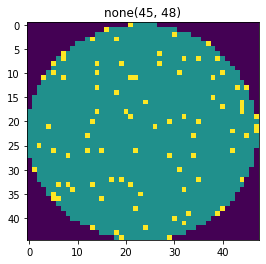

In [9]:
idx = 0
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

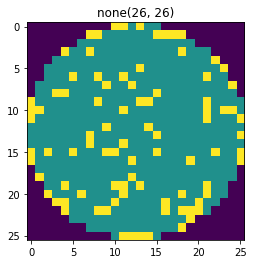

In [10]:
idx = 1000
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

In [11]:
df['lotName']

0             lot1
1             lot1
2             lot1
3             lot1
4             lot1
            ...   
811452    lot47542
811453    lot47542
811454    lot47542
811455    lot47543
811456    lot47543
Name: lotName, Length: 811457, dtype: object

In [12]:
df.lotName.value_counts()
# 없는 lot도 있넹

lot1        25
lot26113    25
lot26129    25
lot26125    25
lot26124    25
            ..
lot9377      1
lot33363     1
lot33362     1
lot33337     1
lot31847     1
Name: lotName, Length: 46293, dtype: int64

In [13]:
df.lotName.value_counts().value_counts()

25    21762
1      3461
12     3032
24     2659
13     1960
9      1404
5      1279
2      1255
10     1077
7      1053
23      991
3       853
4       737
11      682
6       634
22      602
8       560
18      419
21      391
20      336
17      260
16      248
15      246
19      243
14      149
Name: lotName, dtype: int64

In [14]:
df.lotName.value_counts().unique()

array([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

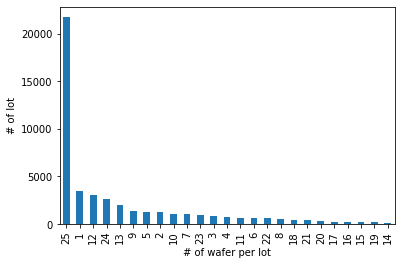

In [15]:
bar_ = df.lotName.value_counts().value_counts().plot.bar(xlabel="# of wafer per lot", ylabel="# of lot")

In [16]:
df.waferIndex.value_counts()

6.0     32745
4.0     32714
5.0     32701
7.0     32672
2.0     32663
8.0     32650
11.0    32637
9.0     32636
3.0     32621
12.0    32598
10.0    32586
1.0     32516
13.0    32381
16.0    32362
14.0    32353
17.0    32333
18.0    32333
21.0    32320
22.0    32312
15.0    32301
20.0    32290
19.0    32285
23.0    32202
24.0    32197
25.0    32049
Name: waferIndex, dtype: int64

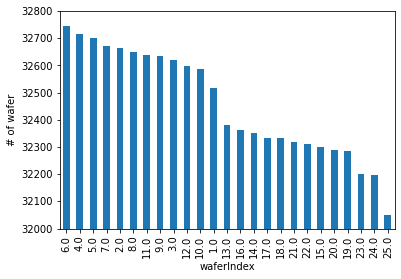

In [17]:
df.waferIndex.value_counts().plot.bar(ylim=(32000,32800), xlabel="waferIndex", ylabel="# of wafer")

In [18]:
df.failureType

0              [[none]]
1              [[none]]
2              [[none]]
3              [[none]]
4              [[none]]
              ...      
811452    [[Edge-Ring]]
811453     [[Edge-Loc]]
811454    [[Edge-Ring]]
811455               []
811456               []
Name: failureType, Length: 811457, dtype: object

In [30]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [82]:
min(df.dieSize.value_counts())

1

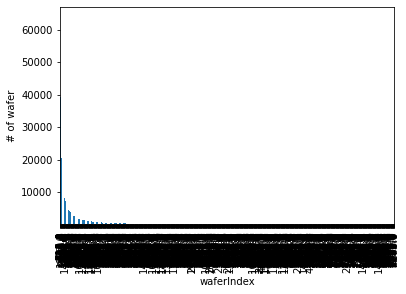

In [54]:
df.dieSize.value_counts().plot.bar(xlim=(3,66961), ylim=(1,67000), xlabel="dieSize", ylabel="# of wafer")

In [40]:
np.where(df.dieSize==min(df.dieSize))

(array([745584]),)

In [48]:
df.iloc[745574:745590,]
# die size가 같은 lot에서 다를수도 있네

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
745574,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",518.0,lot44867,10.0,[[Training]],[[none]]
745575,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2,...",518.0,lot44867,11.0,[[Training]],[[none]]
745576,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,...",518.0,lot44867,12.0,[[Training]],[[none]]
745577,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",518.0,lot44867,13.0,[[Training]],[[none]]
745578,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",518.0,lot44867,14.0,[],[]
745579,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",518.0,lot44867,15.0,[],[]
745580,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,...",518.0,lot44867,16.0,[[Training]],[[none]]
745581,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,...",518.0,lot44867,17.0,[[Training]],[[none]]
745582,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",518.0,lot44867,18.0,[[Training]],[[none]]
745583,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",518.0,lot44867,19.0,[[Training]],[[none]]


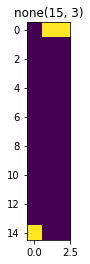

In [55]:
idx = 745584
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)
#dieSize는 가로?

In [58]:
df.waferMap[0].shape

(45, 48)

In [63]:
df.lotName.unique()
#lotName이 빠진것도 있음

array(['lot1', 'lot2', 'lot3', ..., 'lot47541', 'lot47542', 'lot47543'],
      dtype=object)

In [81]:
lotName_list = df.lotName.unique()
total_error = 0
for lot_num in lotName_list:
    temp = df.iloc[np.where(df.lotName==lot_num)[0],]
    temp.reset_index()

    base_size = 0
    for h in range(temp.shape[0]):
        if h==0:
            base_size = temp["dieSize"].iloc[h,]
        else:
            if temp["dieSize"].iloc[h,]!=base_size:
                total_error+=1
print("total error = {}".format(total_error))

total error = 22468
